## Domanda Teorica

GitHub: https://github.com/Annanna98/Text-Mining

Descrivere con proprie parole (not CHAT-GPT oriented) il concetto di time series forecasting e cosa lo differenzia dai problemi ri regressione standard, fornendo esempi ed applicazioni/limiti.

Time series forecasting: si usa per fare delle previsioni basandoci su dati precedentemente osservati dello stesso fenomeno nel tempo (grandezze continue). Un esempio è la predizione del meteo, la quale si basa su medie di dati raccolte durante gli anni. Tra i dati c'è dunque una correlazione
Regressione: in questo caso i dati sono indipendenti tra loro e possono essere continui (regressione lineare) o discreti (regressione logistica). Poichè i dati sono indipendenti, per creare un modello di previsione sarà necessario "sacrificare" una parte del dataset che fungerà da modello per le previsioni future

## Fake news Detection

In [1]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv
path_fake = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv'
path_true = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv'

In [2]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [47]:
df_fake = pd.read_csv(path_fake)
df_true = pd.read_csv(path_true)
df_fake["class"] = 0 #fake
df_true["class"] = 1 #real

df_marge = pd.concat([df_fake, df_true], axis =0 )
df = df_marge.drop(["title", "subject","date"], axis = 1)
df = df.sample(frac = 1).reset_index(drop=True)
df

,text,class
0,It s pretty common knowledge there is no love ...,0
1,WASHINGTON (Reuters) - U.S. House of Represent...,1
2,(Reuters) - Virginia Governor Terry McAuliffe ...,1
3,BUDAPEST (Reuters) - Hungary remains firmly op...,1
4,Hillary may have finally lost the election yes...,0
...,...,...
44893,Where was the media coverage when this black t...,0
44894,WASHINGTON (Reuters) - The United States will ...,1
44895,Fox News is literally pretending that they tre...,0
44896,WASHINGTON (Reuters) - California and Wisconsi...,1


In [48]:
patterns = {
            r'\d+': '',            
            r'[^\w\s]': ' ',         
            r'\b\w{1,2}\b':'',      
            r'(http|www)[^\s]+':'', 
            r'\s+': ' '             
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() 
    return df


clean_column(df, 'text', patterns)

,text,class
0,pretty common knowledge there love lost betwe...,0
1,washington reuters house representatives speak...,1
2,reuters virginia governor terry mcauliffe tue...,1
3,budapest reuters hungary remains firmly oppose...,1
4,hillary may have finally lost the election yes...,0
...,...,...
44893,where was the media coverage when this black t...,0
44894,washington reuters the united states will admi...,1
44895,fox news literally pretending that they treate...,0
44896,washington reuters california and wisconsin sa...,1


In [49]:
df = clean_column(df, 'text', patterns)
df

,text,class
0,pretty common knowledge there love lost betwe...,0
1,washington reuters house representatives speak...,1
2,reuters virginia governor terry mcauliffe tue...,1
3,budapest reuters hungary remains firmly oppose...,1
4,hillary may have finally lost the election yes...,0
...,...,...
44893,where was the media coverage when this black t...,0
44894,washington reuters the united states will admi...,1
44895,fox news literally pretending that they treate...,0
44896,washington reuters california and wisconsin sa...,1


In [51]:
df['class'].value_counts()

0    23481
1    21417
Name: class, dtype: int64

In [29]:
df.head(10)

,text,class
0,kiev reuters the release two crimean tatars fr...,1
1,editors note attention language paragraph tha...,1
2,,0
3,mexico city reuters the governor nuevo leon pr...,1
4,washington reuters house republicans expect in...,1
5,monday cnbc former gov jeb bush said due the s...,0
6,hard for millennials escape the leftist propa...,0
7,vienna reuters the head the united nations nuc...,1
8,funny how things work out the fbi scapegoats ...,0
9,more than clear that donald trump very proud ...,0


In [65]:
df_true = list(map(str, df[df['class']==1]['text']))
df_false = list(map(str, df[df['class']==0]['text']))

df_true = ''.join(df_true)
df_false = ''.join(df_false)

(-0.5, 799.5, 399.5, -0.5)

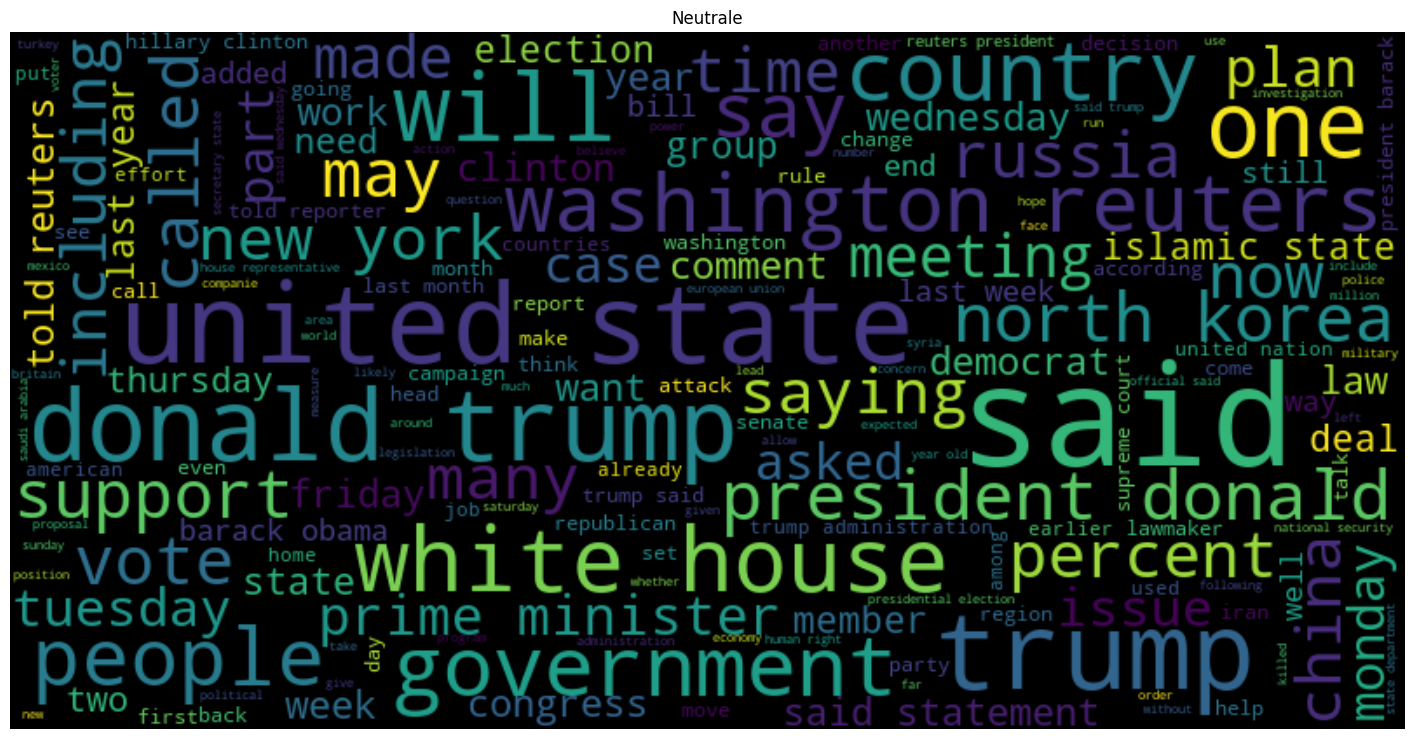

In [68]:
# TRUE
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(df_true)

plt.figure(figsize=(18,10))
plt.title('Neutrale')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

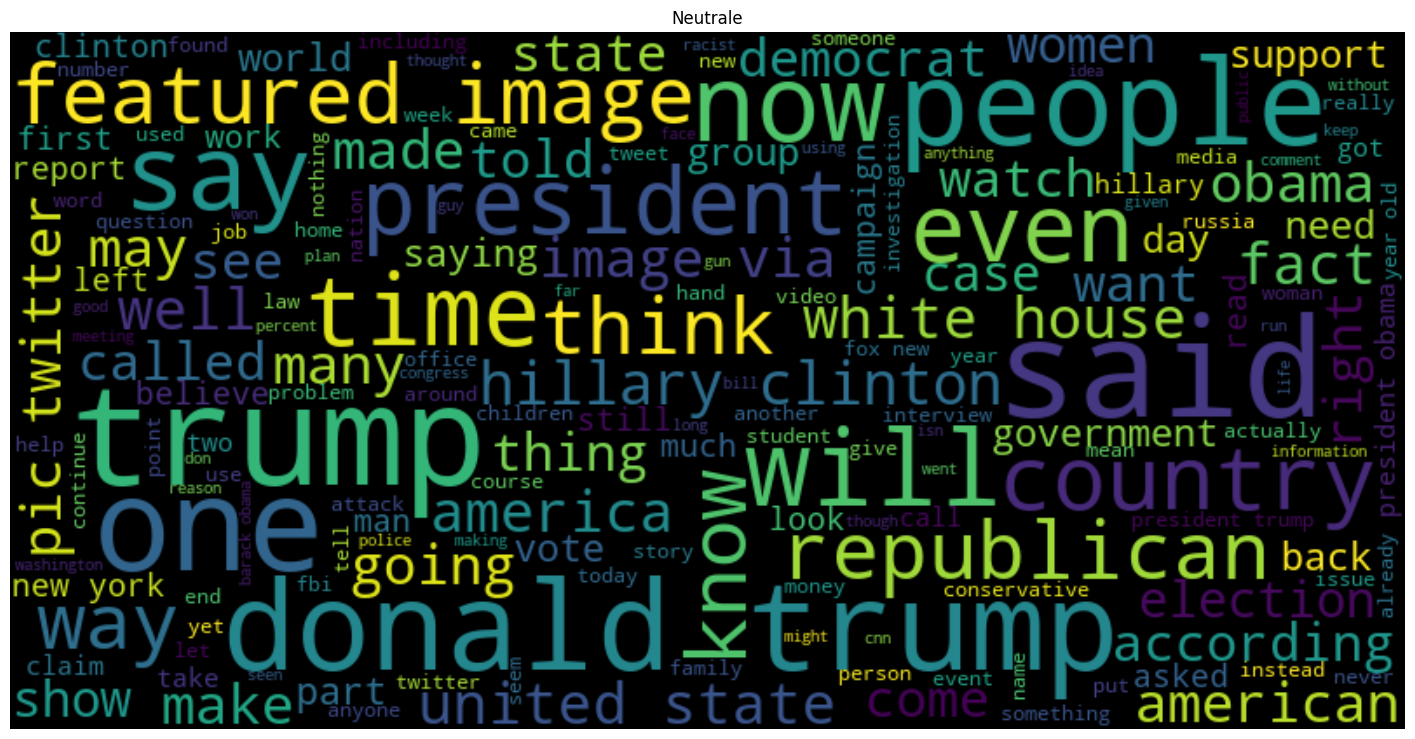

In [69]:
# FALSE
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(df_false)

plt.figure(figsize=(18,10))
plt.title('Neutrale')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [70]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [71]:
X = df['text']
y = df['class']

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
X_vect = vectorizer.fit_transform(X).toarray()
X_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [73]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vect).toarray()
X_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03285736,
        0.        ]])

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [75]:
#Modellazione A
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 


y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.9710467706013363

In [76]:
#Modellazione B
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.9293986636971047

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7115
           1       0.93      0.92      0.92      6355

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



Text(95.72222222222221, 0.5, 'Actual')

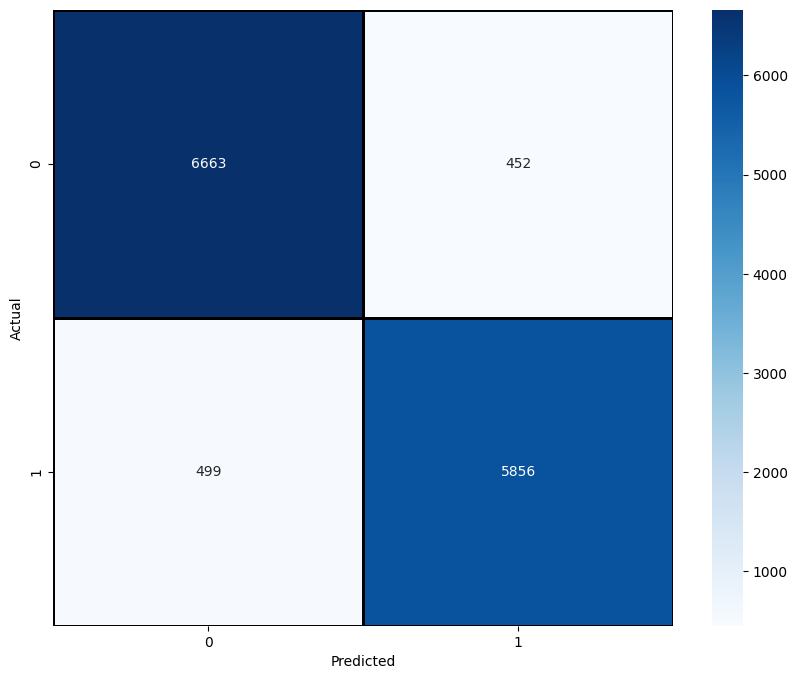

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [81]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
test_data_accuracy

0.9521900519673349

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
clf = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9700816629547142


In [84]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.96686264 0.96739711 0.96329294 0.98538845 0.96685674 0.97148967
 0.96899501 0.96489665]
mean=0.9693974015557256
std=0.006467761788023841


In [85]:
import joblib
joblib.dump(pipe,'fakenews.pkl')

['fakenews.pkl']

In [86]:
import joblib

uploaded_model = joblib.load('fakenews.pkl')
pred = uploaded_model.predict(['very beautiful']) 